Graphs for Fig 4, model panels

Test noise: 1, 2, 4, 8, 16, 32, 64...

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from skmisc.loess import loess
from scipy.signal import find_peaks
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')

model = 'UTG' # DUAL / UTG
path = 'UTG-EF_14rows_CUC_MD/' # DUAL_14rows_CUC_MD/, UTG-EF_14rows_CUC_MD/

#path_single = '../out_batch/batch_2023-03-20_14-30-00_dual_single/'
#path_single = '../out_batch/batch_2023-03-20_12-00-44_UTG_single/'
#path_multi = '../out_batch/batch_2023-03-22_12-38-53__DUAL_noise5pc/'
#path_multi = '../out_batch/batch_2023-03-22_15-57-38__UTGeff_noise5pc/'
#path_multi = '../out_batch/batch_2023-03-22_19-08-04__DUAL_noise10pc/'
#path_multi = '../out_batch/batch_2023-03-22_22-04-13__UTGeff_noise10pc/'

#path_single = '../out_batch/batch_2023-03-23_21-58-39__DUAL_single_moreGTs/'
#path_single = '../out_batch/batch_2023-03-23_22-08-07__UTGeff_single_moreGTs/'
#path_multi = '../out_batch/batch_2023-03-23_10-50-03__DUAL_noise10pc_moreGTs/'
#path_multi = '../out_batch/batch_2023-03-23_15-15-49__UTGeff_noise10pc_moreGTs/'

#path_single = '../out_batch/batch_2023-03-25_11-09-16__DUAL_single_moreGTs/'
path_single = '../out_batch/batch_2023-03-25_11-15-13__UTGeff_single_moreGTs/'
#path_multi = '../out_batch/batch_2023-03-26_11-22-23__DUAL_noise5pc_moreGTs/'
#path_multi = '../out_batch/batch_2023-03-26_17-58-44__UTGeff_noise5pc_moreGTs/'
#path_multi = '../out_batch/batch_2023-03-25_11-26-13__DUAL_noise10pc_moreGTs/'
path_multi = '../out_batch/batch_2023-03-25_14-14-17__UTGeff_noise10pc_moreGTs/'

data_single_raw_s1 = pd.read_csv(path_single + 'auxin_profile_1.csv')
data_single_raw_s2 = pd.read_csv(path_single + 'auxin_profile_2.csv')
data_single_raw_s3 = pd.read_csv(path_single + 'auxin_profile_3.csv')
data_single_raw_s4 = pd.read_csv(path_single + 'auxin_profile_4.csv')
data_single_raw_s5 = pd.read_csv(path_single + 'auxin_profile_5.csv')
data_single_raw_s6 = pd.read_csv(path_single + 'auxin_profile_6.csv')
data_single_raw_s7 = pd.read_csv(path_single + 'auxin_profile_7.csv')
data_single_raw_s8 = pd.read_csv(path_single + 'auxin_profile_8.csv')

data_multi_raw_s1 = pd.read_csv(path_multi + 'auxin_profile_multiple_1.csv')
data_multi_raw_s2 = pd.read_csv(path_multi + 'auxin_profile_multiple_2.csv')
data_multi_raw_s3 = pd.read_csv(path_multi + 'auxin_profile_multiple_3.csv')
data_multi_raw_s4 = pd.read_csv(path_multi + 'auxin_profile_multiple_4.csv')
data_multi_raw_s5 = pd.read_csv(path_multi + 'auxin_profile_multiple_5.csv')
data_multi_raw_s6 = pd.read_csv(path_multi + 'auxin_profile_multiple_6.csv')
data_multi_raw_s7 = pd.read_csv(path_multi + 'auxin_profile_multiple_7.csv')
data_multi_raw_s8 = pd.read_csv(path_multi + 'auxin_profile_multiple_8.csv')

# Select first 13 rows only
data_single_raw_s1, data_single_raw_s2, data_single_raw_s3, data_single_raw_s4, data_single_raw_s5, data_single_raw_s6, data_single_raw_s7, data_single_raw_s8, data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4, data_multi_raw_s5, data_multi_raw_s6, data_multi_raw_s7, data_multi_raw_s8 = [i.head(13) for i in [data_single_raw_s1, data_single_raw_s2, data_single_raw_s3, data_single_raw_s4, data_single_raw_s5, data_single_raw_s6, data_single_raw_s7, data_single_raw_s8, data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4, data_multi_raw_s5, data_multi_raw_s6, data_multi_raw_s7, data_multi_raw_s8]]

# Give x values (cell row) to all datasets
data_x = np.linspace(1, len(data_single_raw_s1.index), len(data_single_raw_s1.index))
data_single_raw_s1['x'], data_single_raw_s2['x'], data_single_raw_s3['x'], data_single_raw_s4['x'], data_single_raw_s5['x'], data_single_raw_s6['x'], data_single_raw_s7['x'], data_single_raw_s8['x'], data_multi_raw_s1['x'], data_multi_raw_s2['x'], data_multi_raw_s3['x'], data_multi_raw_s4['x'], data_multi_raw_s5['x'], data_multi_raw_s6['x'], data_multi_raw_s7['x'], data_multi_raw_s8['x'] = data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x

all_single_samples = [data_single_raw_s1, data_single_raw_s2, data_single_raw_s3, data_single_raw_s4, data_single_raw_s5, data_single_raw_s6, data_single_raw_s7, data_single_raw_s8]

all_multi_samples = [data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4, data_multi_raw_s5, data_multi_raw_s6, data_multi_raw_s7, data_multi_raw_s8]

# Calculate mean and median of profiles replicates
mean_s1, mean_s2, mean_s3, mean_s4, mean_s5, mean_s6, mean_s7, mean_s8 = [i.drop(columns=['x']).mean(axis=1) for i in [data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4, data_multi_raw_s5, data_multi_raw_s6, data_multi_raw_s7, data_multi_raw_s8]]
median_s1, median_s2, median_s3 = [i.drop(columns=['x']).median(axis=1) for i in [data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3]]

all_means = [i.drop(columns=['x']).mean(axis=1) for i in [data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4, data_multi_raw_s5, data_multi_raw_s6, data_multi_raw_s7, data_multi_raw_s8]]
median_s1, median_s2, median_s3 = [i.drop(columns=['x']).median(axis=1) for i in [data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3]]

# This is only needed for loess
data_multi_melted_s1 = pd.melt(data_multi_raw_s1, id_vars='x', value_name='y').sort_values(by='x').reset_index()
data_multi_melted_s2 = pd.melt(data_multi_raw_s2, id_vars='x', value_name='y').sort_values(by='x').reset_index()
data_multi_melted_s3 = pd.melt(data_multi_raw_s3, id_vars='x', value_name='y').sort_values(by='x').reset_index()

In [13]:
data_single_raw_s1

,0,x
0,332.384694,1.0
1,251.065665,2.0
2,185.822550,3.0
3,66.005585,4.0
4,19.871866,5.0
5,20.053515,6.0
6,66.083630,7.0
7,152.358288,8.0
8,154.336495,9.0
9,111.980951,10.0


In [14]:
data_multi_raw_s1

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,x
0,443.596040,465.682437,416.517358,375.629288,348.421271,474.297966,294.049813,338.577450,503.067031,73.335639,...,203.837097,311.620947,287.095378,407.875818,275.002227,85.671208,470.102071,324.036644,302.073452,1.0
1,266.321534,231.348013,258.748276,263.153083,246.500657,260.136667,267.774282,254.499716,245.767414,261.956931,...,249.159402,238.726133,252.929345,258.406746,245.942485,233.333155,256.833442,250.956256,233.683869,2.0
2,120.203073,101.058386,93.892378,95.715203,193.730977,97.319573,184.959280,117.115218,90.535134,238.995938,...,293.229021,106.586630,101.029128,101.944396,99.682759,230.841735,91.738175,92.895950,96.578121,3.0
3,45.242675,35.329045,27.141016,34.329565,69.853310,39.180392,61.293018,40.039677,31.546432,190.421475,...,189.537350,42.086242,36.836207,38.158309,38.048951,98.552483,33.491981,24.829860,37.830776,4.0
4,15.382117,12.630215,16.585701,12.851502,18.599164,15.471875,20.018876,14.635565,15.552355,77.072467,...,62.868967,16.489229,12.840342,13.044424,16.198033,34.324991,12.620459,26.060946,13.220326,5.0
5,21.841105,17.482977,44.632135,20.179016,21.541454,22.116929,31.866294,21.712652,20.931966,23.778494,...,21.318970,20.756445,18.310976,15.166231,13.659046,37.088765,15.758084,83.479744,18.644710,6.0
6,76.938080,44.640208,96.611068,74.057923,65.422524,85.847969,125.940155,77.898070,61.670590,19.321924,...,26.147427,69.041682,63.530965,45.041360,49.742130,125.887333,54.531304,225.698850,64.081440,7.0
7,165.787644,125.749357,153.289647,145.292273,132.303638,194.964731,132.294078,165.266485,136.803102,31.628821,...,70.387424,192.169941,139.692927,97.704704,107.090311,201.412370,143.829659,291.146352,135.836926,8.0
8,128.120547,169.654092,86.042691,119.569636,91.926548,116.717589,82.634728,130.610414,86.953830,70.149842,...,108.004607,113.873727,88.142091,134.215269,105.886062,119.488650,72.133853,140.306164,82.183542,9.0
9,90.147245,197.288307,57.545057,69.619785,67.581242,67.051928,43.394001,81.225934,58.490014,47.691170,...,110.790556,68.622457,58.721900,141.599917,69.187795,88.321484,65.434806,78.913544,59.341166,10.0


In [15]:
# Function to calculate loess curves

def loess_fit(x, y, span=1):
    """
    Loess fit and confidence intervals.
    The span controls the fraction of points used for the local regressions. The default of loess() is 0.75.
    prediction.confidence(a) -> if a = 0.05, CI = 95
    """
    # setup
    lo = loess(x, y, span=span)
    # fit
    lo.fit()
    # Predict
    prediction = lo.predict(x, stderror=True)
    # Compute confidence intervals
    ci = prediction.confidence(0.05)
    # Since we are wrapping the functionality in a function,
    # we need to make new arrays that are not tied to the
    # loess objects
    yfit = prediction.values
    ymin = ci.lower
    ymax = ci.upper
    return {'x': x, 'yfit': yfit, 'ymin': ymin, 'ymax': ymax}

In [16]:
# Calculate loess
#l_x, l_yfit, l_ymin, l_ymax = loess_fit(data_multi_melted_s1['x'], data_multi_melted['y'], span=.75)
loess_s1 = loess_fit(data_multi_melted_s1['x'], data_multi_melted_s1['y'], span=.75)
loess_s2 = loess_fit(data_multi_melted_s2['x'], data_multi_melted_s2['y'], span=.75)
loess_s3 = loess_fit(data_multi_melted_s3['x'], data_multi_melted_s3['y'], span=.75)


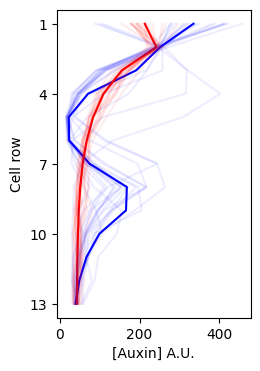

In [17]:
# Make figure multiple samples
fig1, ax1 = plt.subplots(1,1, figsize=(2.5,4))

ax1.plot(data_single_raw_s2['0'], data_single_raw_s2['x'], color='blue')
ax1.plot(data_single_raw_s6['0'], data_single_raw_s6['x'], color='red')

for col in data_multi_raw_s2.drop(columns=['x']):
    ax1.plot(data_multi_raw_s2[col], data_multi_raw_s2['x'], color='blue', alpha=.07)
for col in data_multi_raw_s6.drop(columns=['x']):
    ax1.plot(data_multi_raw_s6[col], data_multi_raw_s6['x'], color='red', alpha=.07)

#ax1.fill_betweenx(loess_s1['x'], loess_s1['ymin'], loess_s1['ymax'], alpha=.2, color='blue', linewidth=0)
#ax1.fill_betweenx(loess_s2['x'], loess_s2['ymin'], loess_s2['ymax'], alpha=.2, color='red', linewidth=0)
#ax1.fill_betweenx(loess_s3['x'], loess_s3['ymin'], loess_s3['ymax'], alpha=.2, color='green', linewidth=0)

#ax1.plot(mean_s1, data_x, color='blue', linestyle='--')
#ax1.plot(mean_s2, data_x, color='red')
#ax1.plot(mean_s3, data_x, color='red', linestyle='--')
#ax1.plot(mean_s4, data_x, color='blue')
#ax1.plot(mean_s5, data_x, color='red', linestyle='--')
#ax1.plot(mean_s6, data_x, color='green', linestyle='--')

ax1.set_yticks([1,4,7,10,13])
ax1.invert_yaxis()
plt.xlabel('[Auxin] A.U.')
plt.ylabel('Cell row')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

plt.show()

In [18]:
# Make figure 2 (individual plots)

def make_individual_plot(sample_single=None, sample_multi=None, mean=None, x=data_x, loess=None):

    fig2, ax1 = plt.subplots(1,1, figsize=(3,4))

    #ax1.plot(sample_single['0'], sample_single['x'], color='blue', linestyle='--')

    for col in sample_multi.drop(columns=['x']):
        ax1.plot(sample_multi[col], sample_multi['x'], color='blue', alpha=.15)

    #ax1.fill_betweenx(loess['x'], loess['ymin'], loess['ymax'], alpha=.2, color='blue', linewidth=0)

    ax1.plot(mean, data_x, color='blue')

    ax1.set_yticks([1,4,7,10,13])
    ax1.invert_yaxis()
    plt.xlabel('[Auxin] A.U.')
    plt.ylabel('Cell row')
    #fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
    #fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

    plt.show()

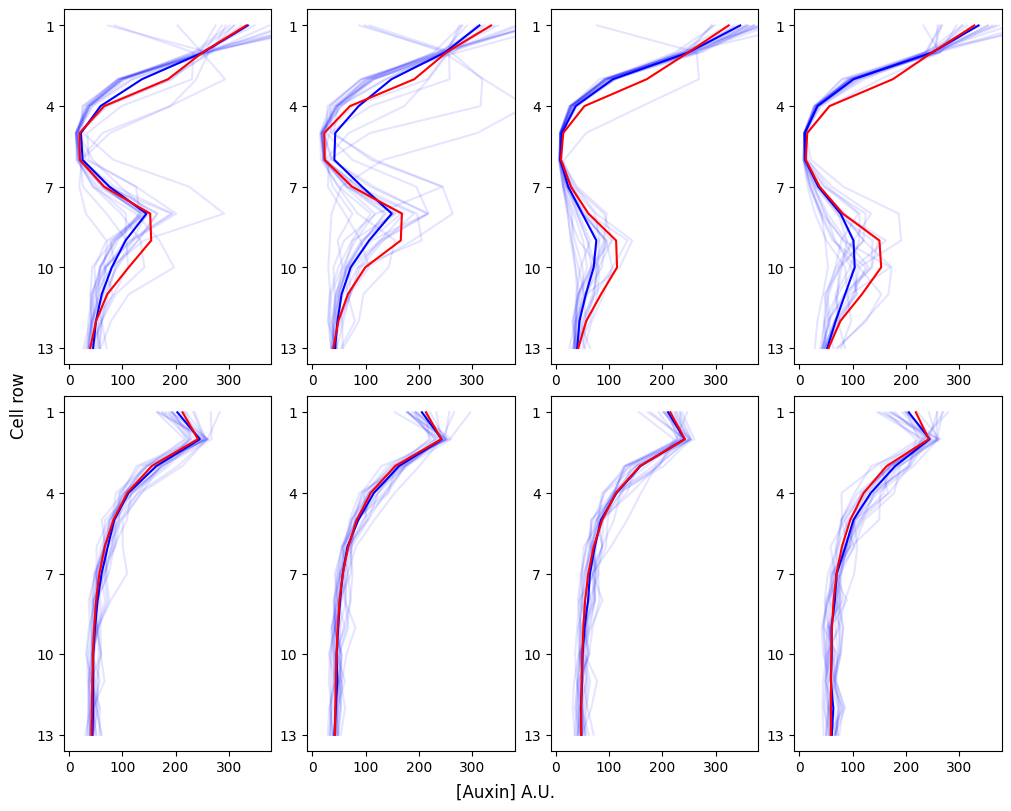

In [19]:
# Individual composite plot

fig3, axes = plt.subplots(2,4, figsize=(10,8), constrained_layout=True)
for data, ax in zip(all_multi_samples, axes.ravel()):
    for col in data.drop(columns=['x']):
        ax.plot(data[col], data['x'], color='blue', alpha=.1)
for mean, ax in zip(all_means, axes.ravel()):
    ax.plot(mean, data_x, color='blue')
for data, ax in zip(all_single_samples, axes.ravel()):
    ax.plot(data['0'], data_x, color='red')
for ax in axes.ravel():    
    ax.set_yticks([1,4,7,10,13])
    ax.invert_yaxis()
    ax.set_xlim(-10,380)   
fig3.supxlabel('[Auxin] A.U.')
fig3.supylabel('Cell row')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

plt.show()

In [20]:
# Find peaks

# Iterate over samples and replicates and extract metrics from the auxin site(s) that form(s) on the margin           
all_peaks = pd.DataFrame(columns=['sample', 'replica', 'pos', 'height'])

for sample_id, sample in enumerate(all_multi_samples):
    for replica in sample.drop(columns=['x']):
        peaks = list(find_peaks(sample[replica], height = 1, threshold = 1, distance = 1))
        if len(peaks[0]) == 0:
            pass
        if len(peaks[0]) == 1:
            peak_position = data_single_raw_s1['x'][peaks[0][0]] #peak_pos = sample['x'][peaks[0][0]]
            peak_height = peaks[1]['peak_heights'][0]
            all_peaks = all_peaks.append(pd.DataFrame({'sample': sample_id, 'replica': replica, 'pos': float(peak_position), 'height': peak_height}, index=[0]), ignore_index=True)
        if len(peaks[0]) > 1:
            # Select peak with highest amplitude, excluding the peak that represents the tip of the leaf (cell row)
            # If distal auxin site (rows 0, 1, 2, 3) is detected as peak, remove it from the list of peaks. 
            if peaks[0][0] < 4:
                peaks[0] = np.delete(peaks[0], 0)
                peaks[1]['peak_heights'] = np.delete(peaks[1]['peak_heights'], 0)
            # Select highest peak
            max_height_value = np.amax(peaks[1]['peak_heights'])
            max_height_index = np.argmax(peaks[1]['peak_heights'])
            position = peaks[0][max_height_index]+1
            all_peaks = all_peaks.append(pd.DataFrame({'sample': sample_id, 'replica': replica, 'pos': float(position), 'height': max_height_value}, index=[0]), ignore_index=True)

#all_peaks['pos'] = all_peaks['pos'].astype(int)
all_peaks[all_peaks['sample'] == 0]

,sample,replica,pos,height
0,0,0,8.0,165.787644
1,0,1,10.0,197.288307
2,0,2,8.0,153.289647
3,0,3,8.0,145.292273
4,0,4,8.0,132.303638
5,0,5,8.0,194.964731
6,0,6,8.0,132.294078
7,0,7,8.0,165.266485
8,0,8,8.0,136.803102
9,0,9,9.0,70.149842


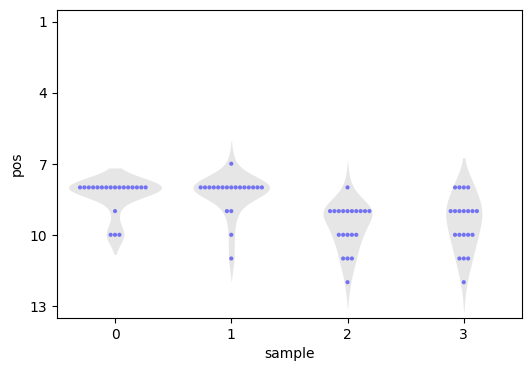

In [21]:
# Graph position and amplitude of peaks

all_peaks_wt = all_peaks[all_peaks['sample'] < 4]

fig4, ax = plt.subplots(1,1, figsize=(6,4))
ax.set_ylim(.5, 13.5)
ax.invert_yaxis()
ax.set_yticks([1,4,7,10,13])
sns.violinplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.pos, alpha=0.5, size=3, linewidth=0, color=(.9, .9, .9))
sns.swarmplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.pos, alpha=0.5, color='blue', size=3)
plt.show()

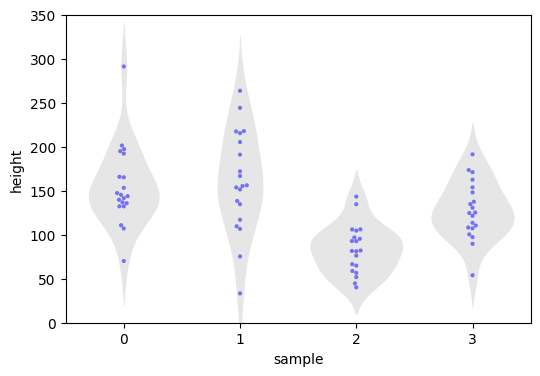

In [22]:
fig5, ax = plt.subplots(1,1, figsize=(6,4))
ax.set_ylim(0, 350)
sns.violinplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.height, alpha=0.5, size=3, linewidth=0, color=(.9, .9, .9))
sns.swarmplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.height, alpha=0.5, color='blue', size=3)
plt.show()